In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
file_path = 'parametri_simul_1.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
params_1 = parametri_caricati['parameters']
z_1 = parametri_caricati['z']
iter_1 = parametri_caricati['iter']

In [3]:
file_path = 'parametri_simul_2.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
params_2 = parametri_caricati['parameters']
z_2 = parametri_caricati['z']
iter_2 = parametri_caricati['iter']

In [4]:
file_path = 'parametri_simul_3.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
params_3 = parametri_caricati['parameters']
z_3 = parametri_caricati['z']
iter_3 = parametri_caricati['iter']

In [5]:
params=[]
for i in range(33):
    params.append(params_1[i])
    params.append(params_2[i])
    params.append(params_3[i])
params.append(params_3[33])

### Distribution of random intercept

In [27]:
w = [0.4, 0.3, 0.3]
cluster = np.repeat(np.arange(1, len(w) + 1), [int(w[i] * 5000) for i in range(len(w))])

mean_1 = [-10,-10]
cov_1 = np.array([[0.7, 0.5], [0.5, 3]])
mean_2 = [0,0]
cov_2 = np.array([[2, -1], [-1, 3]])
mean_3 = [0,-12]
cov_3 = np.array([[0.5, 0.2], [0.2, 1]])

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(w[0] * 5000))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(w[1] * 5000))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(w[2] * 5000))
data = np.vstack((data_1, data_2, data_3)) # combina i dati

data = pd.DataFrame(data, columns=['x1', 'x2'])
data['x1'] = preprocessing.scale(data.x1)
data['x2'] = preprocessing.scale(data.x2)

params_1_knots = []
params_2_knots = []
params_3_knots = []

for j in range(100):
  fitted_cluster = np.zeros(5000)
  for i in range(5000):
    fitted_cluster[i] = np.argmax(params[j]['z'][i]) + 1

  mean_real_1 = data[['x1','x2']][cluster==1].mean()
  mean_real_2 = data[['x1','x2']][cluster==2].mean()
  mean_real_3 = data[['x1','x2']][cluster==3].mean()
  mean_fitted_1 = data[['x1','x2']][fitted_cluster==1].mean()
  mean_fitted_2 = data[['x1','x2']][fitted_cluster==2].mean()
  mean_fitted_3 = data[['x1','x2']][fitted_cluster==3].mean()

  # cerco cluster corrispondente al cluster 1
  if np.linalg.norm(mean_real_1 - mean_fitted_1) < np.linalg.norm(mean_real_1 - mean_fitted_2) and np.linalg.norm(mean_real_1 - mean_fitted_1) < np.linalg.norm(mean_real_1 - mean_fitted_3):
    params_1_knots.append(params[j]['knots'][0])
  elif np.linalg.norm(mean_real_1 - mean_fitted_2) < np.linalg.norm(mean_real_1 - mean_fitted_1) and np.linalg.norm(mean_real_1 - mean_fitted_2) < np.linalg.norm(mean_real_1 - mean_fitted_3):
    params_1_knots.append(params[j]['knots'][1])
  else :
    params_1_knots.append(params[j]['knots'][2])

  # cerco cluster corrispondente al cluster 2
  if np.linalg.norm(mean_real_2 - mean_fitted_1) < np.linalg.norm(mean_real_2 - mean_fitted_2) and np.linalg.norm(mean_real_2 - mean_fitted_1) < np.linalg.norm(mean_real_2 - mean_fitted_3):
    params_2_knots.append(params[j]['knots'][0])
  elif np.linalg.norm(mean_real_2 - mean_fitted_2) < np.linalg.norm(mean_real_2 - mean_fitted_1) and np.linalg.norm(mean_real_2 - mean_fitted_2) < np.linalg.norm(mean_real_2 - mean_fitted_3):
    params_2_knots.append(params[j]['knots'][1])
  else :
    params_2_knots.append(params[j]['knots'][2])

  # cerco cluster corrispondente al cluster 3
  if np.linalg.norm(mean_real_3 - mean_fitted_1) < np.linalg.norm(mean_real_3 - mean_fitted_2) and np.linalg.norm(mean_real_3 - mean_fitted_1) < np.linalg.norm(mean_real_3 - mean_fitted_3):
    params_3_knots.append(params[j]['knots'][0])
  elif np.linalg.norm(mean_real_3 - mean_fitted_2) < np.linalg.norm(mean_real_3 - mean_fitted_1) and np.linalg.norm(mean_real_3 - mean_fitted_2) < np.linalg.norm(mean_real_3 - mean_fitted_3):
    params_3_knots.append(params[j]['knots'][1])
  else :
    params_3_knots.append(params[j]['knots'][2])

In [53]:
coeff_1_1 = []
coeff_1_2 = []
coeff_2_1 = []
coeff_2_2 = []
coeff_2_3 = []
coeff_3_1 = []
coeff_3_2 = []
coeff_3_3 = []
for i in range(100):
    if len(params_1_knots[i]) == 2:
        coeff_1_1.append(sorted(params_1_knots[i])[0])
        coeff_1_2.append(sorted(params_1_knots[i])[1])
    if len(params_2_knots[i]) == 3:
        coeff_2_1.append(sorted(params_2_knots[i])[0])
        coeff_2_2.append(sorted(params_2_knots[i])[1])
        coeff_2_3.append(sorted(params_2_knots[i])[2])
    if len(params_3_knots[i]) == 3:
        coeff_3_1.append(sorted(params_3_knots[i])[0])
        coeff_3_2.append(sorted(params_3_knots[i])[1])
        coeff_3_3.append(sorted(params_3_knots[i])[2])


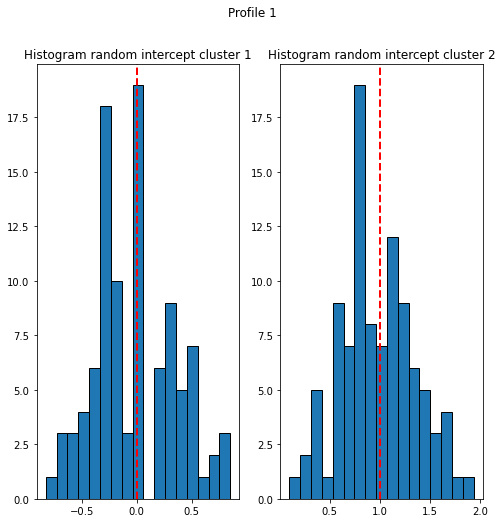

In [70]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs = axs.flatten()

axs[0].hist(coeff_1_1, bins=17, edgecolor='black')
axs[0].axvline(x=0, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[0].set_title('Histogram random intercept cluster 1')

axs[1].hist(coeff_1_2, bins=17, edgecolor='black')
axs[1].axvline(x=1, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[1].set_title('Histogram random intercept cluster 2')

fig.suptitle('Profile 1')
plt.savefig('Histogram rand inter - cluster 1.png')

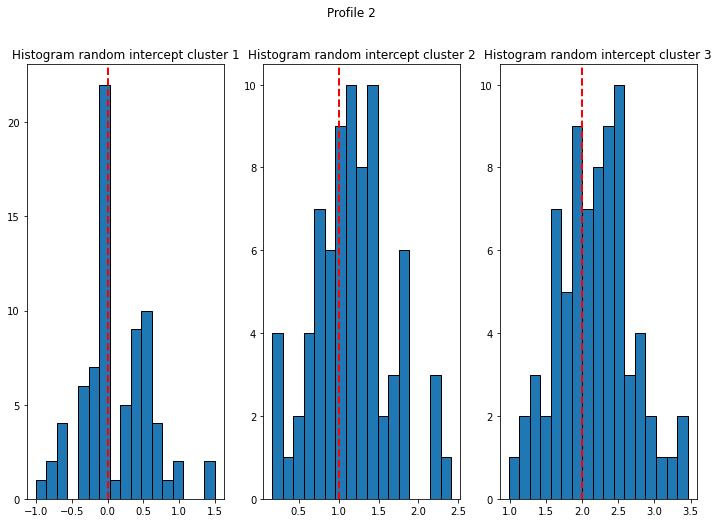

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
axs = axs.flatten()

axs[0].hist(coeff_2_1, bins=17, edgecolor='black')
axs[0].axvline(x=0, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[0].set_title('Histogram random intercept cluster 1')

axs[1].hist(coeff_2_2, bins=17, edgecolor='black')
axs[1].axvline(x=1, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[1].set_title('Histogram random intercept cluster 2')

axs[2].hist(coeff_2_3, bins=17, edgecolor='black')
axs[2].axvline(x=2, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[2].set_title('Histogram random intercept cluster 3')

fig.suptitle('Profile 2')
plt.savefig('Histogram rand inter - cluster 2.png')

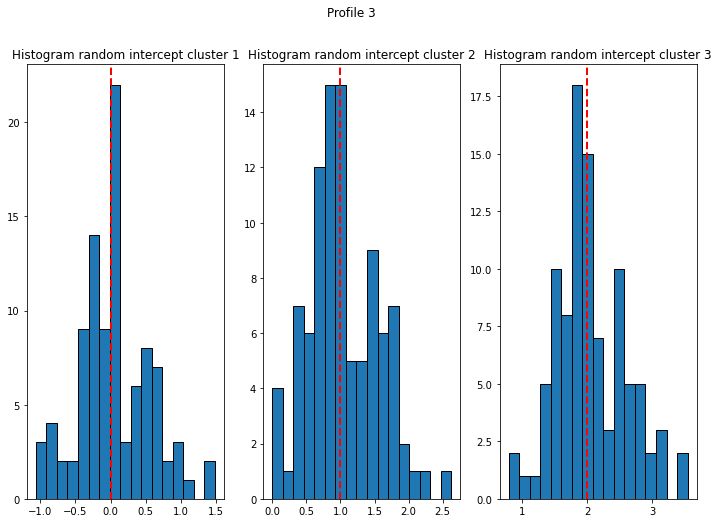

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
axs = axs.flatten()

axs[0].hist(coeff_3_1, bins=17, edgecolor='black')
axs[0].axvline(x=0, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[0].set_title('Histogram random intercept cluster 1')

axs[1].hist(coeff_3_2, bins=17, edgecolor='black')
axs[1].axvline(x=1, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[1].set_title('Histogram random intercept cluster 2')

axs[2].hist(coeff_3_3, bins=17, edgecolor='black')
axs[2].axvline(x=2, color='red', linestyle='dashed', linewidth=2, label='Vertical Line at x=0')
axs[2].set_title('Histogram random intercept cluster 3')

fig.suptitle('Profile 3')
plt.savefig('Histogram rand inter - cluster 3.png')

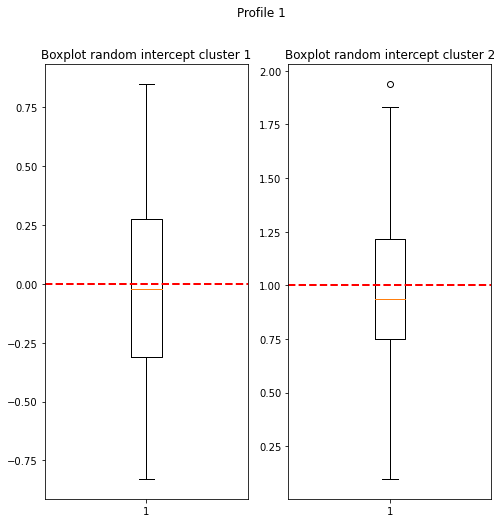

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs = axs.flatten()

axs[0].boxplot(coeff_1_1)
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='clust1')
axs[0].set_title('Boxplot random intercept cluster 1')

axs[1].boxplot(coeff_1_2)
axs[1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='clust2')
axs[1].set_title('Boxplot random intercept cluster 2')

fig.suptitle('Profile 1')
plt.savefig('Boxplot rand inter- cluster 1.png')

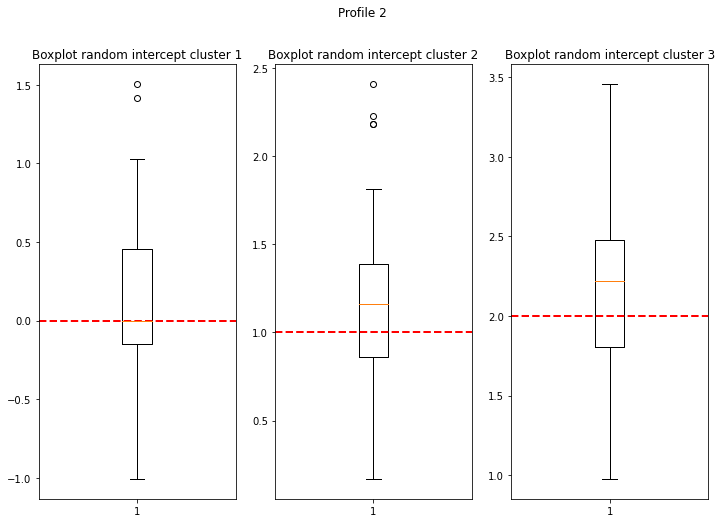

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
axs = axs.flatten()

axs[0].boxplot(coeff_2_1)
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='clust1')
axs[0].set_title('Boxplot random intercept cluster 1')

axs[1].boxplot(coeff_2_2)
axs[1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='clust2')
axs[1].set_title('Boxplot random intercept cluster 2')

axs[2].boxplot(coeff_2_3)
axs[2].axhline(y=2, color='red', linestyle='--', linewidth=2, label='clust2')
axs[2].set_title('Boxplot random intercept cluster 3')

fig.suptitle('Profile 2')
plt.savefig('Boxplot rand inter- cluster 2.png')

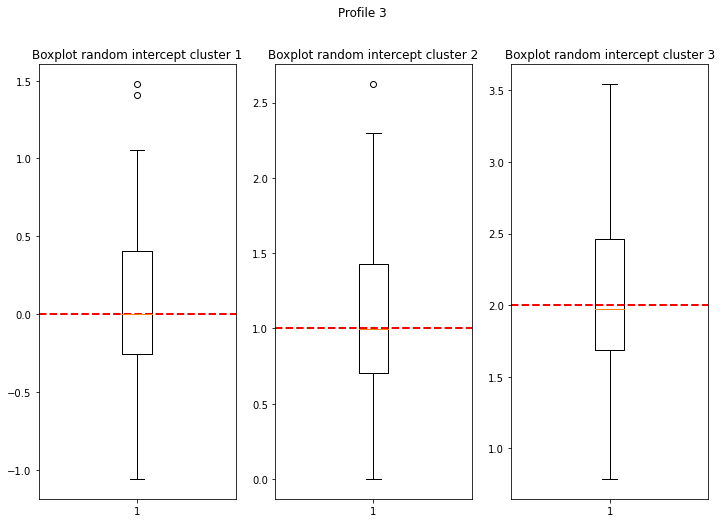

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
axs = axs.flatten()

axs[0].boxplot(coeff_3_1)
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='clust1')
axs[0].set_title('Boxplot random intercept cluster 1')

axs[1].boxplot(coeff_3_2)
axs[1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='clust2')
axs[1].set_title('Boxplot random intercept cluster 2')

axs[2].boxplot(coeff_3_3)
axs[2].axhline(y=2, color='red', linestyle='--', linewidth=2, label='clust2')
axs[2].set_title('Boxplot random intercept cluster 3')

fig.suptitle('Profile 3')
plt.savefig('Boxplot rand inter- cluster 3.png')

In [76]:
mean_1_1 = np.mean(coeff_1_1)
std_1_1 = np.std(coeff_1_1)
mean_1_2 = np.mean(coeff_1_2)
std_1_2 = np.std(coeff_1_2)

mean_2_1 = np.mean(coeff_2_1)
std_2_1 = np.std(coeff_2_1)
mean_2_2 = np.mean(coeff_2_2)
std_2_2 = np.std(coeff_2_2)
mean_2_3 = np.mean(coeff_2_3)
std_2_3 = np.std(coeff_2_3)

mean_3_1 = np.mean(coeff_3_1)
std_3_1 = np.std(coeff_3_1)
mean_3_2 = np.mean(coeff_3_2)
std_3_2 = np.std(coeff_3_2)
mean_3_3 = np.mean(coeff_3_3)
std_3_3 = np.std(coeff_3_3)

In [77]:
rand_inter_1 = {'True random intercept' : [0,1],
             'Fitted Mean' : [mean_1_1, mean_1_2],
             'Fitted Standard Deviation' : [std_1_1,std_1_2]
             }
rand_inter_1 = pd.DataFrame(rand_inter_1)
rand_inter_1

,True random intercept,Fitted Mean,Fitted Standard Deviation
0,0,-0.025345,0.374651
1,1,0.976049,0.372590


In [78]:
rand_inter_2 = {'True random intercept' : [0,1,2],
             'Fitted Mean' : [mean_2_1, mean_2_2, mean_2_3],
             'Fitted Standard Deviation' : [std_2_1,std_2_2, std_2_3]
             }
rand_inter_2 = pd.DataFrame(rand_inter_2)
rand_inter_2

,True random intercept,Fitted Mean,Fitted Standard Deviation
0,0,0.130611,0.480665
1,1,1.158486,0.468715
2,2,2.165740,0.506701


In [79]:
rand_inter_3 = {'True random intercept' : [0,1,2],
             'Fitted Mean' : [mean_3_1, mean_3_2, mean_3_3],
             'Fitted Standard Deviation' : [std_3_1,std_3_2, std_3_3]
             }
rand_inter_3 = pd.DataFrame(rand_inter_3)
rand_inter_3

,True random intercept,Fitted Mean,Fitted Standard Deviation
0,0,0.033993,0.504803
1,1,1.046077,0.511618
2,2,2.053017,0.536925


### Accuracy

In [3]:
file_path = 'parametri_GLM_1.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
acc_1 = parametri_caricati['acc']
acc_GLM_1 = parametri_caricati['acc_GLM']
acc_GLMER_1 = parametri_caricati['acc_GLMER']
auc_1 = parametri_caricati['auc']

In [4]:
file_path = 'parametri_GLM_2.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
acc_2 = parametri_caricati['acc']
acc_GLM_2 = parametri_caricati['acc_GLM']
acc_GLMER_2 = parametri_caricati['acc_GLMER']
auc_2 = parametri_caricati['auc']

In [5]:
file_path = 'parametri_GLM_3.pkl'
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)
    
acc_3 = parametri_caricati['acc']
acc_GLM_3 = parametri_caricati['acc_GLM']
acc_GLMER_3 = parametri_caricati['acc_GLMER']
auc_3 = parametri_caricati['auc']

In [6]:
acc = acc_1 + acc_2 + acc_3
acc_GLM = acc_GLM_1 + acc_GLM_2 + acc_GLM_3
acc_GLMER = acc_GLMER_1 + acc_GLMER_2 + acc_GLMER_3
auc = auc_1 + auc_2 + auc_3

In [7]:
np.mean(acc)

0.7075279999999999

In [10]:
np.std(acc)

0.01083813710930066

In [8]:
np.mean(acc_GLM)

0.587108

In [11]:
np.std(acc_GLM)

0.011070913964077217

In [9]:
np.mean(acc_GLMER)

0.5958960000000001

In [12]:
np.std(acc_GLMER)

0.021127450958409535

In [140]:
np.mean(auc)

0.7717173244749991

In [13]:
np.std(auc)

0.008561765649153154

In [132]:
np.mean(acc)

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

### Stima mu, sigma e lambda


In [6]:
w = [0.4, 0.3, 0.3]
cluster = np.repeat(np.arange(1, len(w) + 1), [int(w[i] * 5000) for i in range(len(w))])

mean_1 = [-10,-10]
cov_1 = np.array([[0.7, 0.5], [0.5, 3]])
mean_2 = [0,0]
cov_2 = np.array([[2, -1], [-1, 3]])
mean_3 = [0,-12]
cov_3 = np.array([[0.5, 0.2], [0.2, 1]])

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(w[0] * 5000))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(w[1] * 5000))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(w[2] * 5000))
data = np.vstack((data_1, data_2, data_3)) # combina i dati

data = pd.DataFrame(data, columns=['x1', 'x2'])
data['x1'] = preprocessing.scale(data.x1)
data['x2'] = preprocessing.scale(data.x2)

mu_1 = []
mu_2 = []
mu_3 = []
sigma_1 = []
sigma_2 = []
sigma_3 = []
lam_1 = []
lam_2 = []
lam_3 = []

for j in range(100):
  fitted_cluster = np.zeros(5000)
  for i in range(5000):
    fitted_cluster[i] = np.argmax(params[j]['z'][i]) + 1

  mean_real_1 = data[['x1','x2']][cluster==1].mean()
  mean_real_2 = data[['x1','x2']][cluster==2].mean()
  mean_real_3 = data[['x1','x2']][cluster==3].mean()
  mean_fitted_1 = data[['x1','x2']][fitted_cluster==1].mean()
  mean_fitted_2 = data[['x1','x2']][fitted_cluster==2].mean()
  mean_fitted_3 = data[['x1','x2']][fitted_cluster==3].mean()

  # cerco cluster corrispondente al cluster 1
  if np.linalg.norm(mean_real_1 - mean_fitted_1) < np.linalg.norm(mean_real_1 - mean_fitted_2) and np.linalg.norm(mean_real_1 - mean_fitted_1) < np.linalg.norm(mean_real_1 - mean_fitted_3):
    mu_1.append(params[j]['mu'][0])
    sigma_1.append(params[j]['sigma'][:,:,0])
    lam_1.append(params[j]['lam'][0])
  elif np.linalg.norm(mean_real_1 - mean_fitted_2) < np.linalg.norm(mean_real_1 - mean_fitted_1) and np.linalg.norm(mean_real_1 - mean_fitted_2) < np.linalg.norm(mean_real_1 - mean_fitted_3):
    mu_1.append(params[j]['mu'][1])
    sigma_1.append(params[j]['sigma'][:,:,1])
    lam_1.append(params[j]['lam'][1])
  else :
    mu_1.append(params[j]['mu'][2])
    sigma_1.append(params[j]['sigma'][:,:,2])
    lam_1.append(params[j]['lam'][2])

  # cerco cluster corrispondente al cluster 2
  if np.linalg.norm(mean_real_2 - mean_fitted_1) < np.linalg.norm(mean_real_2 - mean_fitted_2) and np.linalg.norm(mean_real_2 - mean_fitted_1) < np.linalg.norm(mean_real_2 - mean_fitted_3):
    mu_2.append(params[j]['mu'][0])
    sigma_2.append(params[j]['sigma'][:,:,0])
    lam_2.append(params[j]['lam'][0])
  elif np.linalg.norm(mean_real_2 - mean_fitted_2) < np.linalg.norm(mean_real_2 - mean_fitted_1) and np.linalg.norm(mean_real_2 - mean_fitted_2) < np.linalg.norm(mean_real_2 - mean_fitted_3):
    mu_2.append(params[j]['mu'][1])
    sigma_2.append(params[j]['sigma'][:,:,1])
    lam_2.append(params[j]['lam'][1])
  else :
    mu_2.append(params[j]['mu'][2])
    sigma_2.append(params[j]['sigma'][:,:,2])
    lam_2.append(params[j]['lam'][2])

  # cerco cluster corrispondente al cluster 3
  if np.linalg.norm(mean_real_3 - mean_fitted_1) < np.linalg.norm(mean_real_3 - mean_fitted_2) and np.linalg.norm(mean_real_3 - mean_fitted_1) < np.linalg.norm(mean_real_3 - mean_fitted_3):
    mu_3.append(params[j]['mu'][0])
    sigma_3.append(params[j]['sigma'][:,:,0])
    lam_3.append(params[j]['lam'][0])
  elif np.linalg.norm(mean_real_3 - mean_fitted_2) < np.linalg.norm(mean_real_3 - mean_fitted_1) and np.linalg.norm(mean_real_3 - mean_fitted_2) < np.linalg.norm(mean_real_3 - mean_fitted_3):
    mu_3.append(params[j]['mu'][1])
    sigma_3.append(params[j]['sigma'][:,:,1])
    lam_3.append(params[j]['lam'][1])
  else :
    mu_3.append(params[j]['mu'][2])
    sigma_3.append(params[j]['sigma'][:,:,2])
    lam_3.append(params[j]['lam'][2])

In [7]:
mu_1_1=[]
mu_1_2=[]
mu_2_1=[]
mu_2_2=[]
mu_3_1=[]
mu_3_2=[]
for i in range(100):
    mu_1_1.append(mu_1[i][0])
    mu_1_2.append(mu_1[i][1])
    mu_2_1.append(mu_2[i][0])
    mu_2_2.append(mu_2[i][1])
    mu_3_1.append(mu_3[i][0])
    mu_3_2.append(mu_3[i][1])
    

In [8]:
est_mu_1 = {'True mu1': [mean_real_1[0],mean_real_2[0],mean_real_3[0]],
                   'Estimated Mean mu1': [np.mean(mu_1_1),np.mean(mu_2_1),np.mean(mu_3_1)],
                   'Standard Deviation mu1': [np.std(mu_1_1),np.std(mu_2_1),np.std(mu_3_1)],
           'True mu2': [mean_real_1[1],mean_real_2[1],mean_real_3[1]],
                   'Estimated Mean mu2': [np.mean(mu_1_2),np.mean(mu_2_2),np.mean(mu_3_2)],
                   'Standard Deviation mu2': [np.std(mu_1_2),np.std(mu_2_2),np.std(mu_3_2)]}
est_mu_1 = pd.DataFrame(est_mu_1)
est_mu_1

,True mu1,Estimated Mean mu1,Standard Deviation mu1,True mu2,Estimated Mean mu2,Standard Deviation mu2
0,-1.199710,-1.199393,0.000563,-0.449728,-0.454696,0.004402
1,0.803398,0.799975,0.004272,1.439499,1.440089,0.001585
2,0.796215,0.799215,0.004144,-0.839862,-0.833827,0.004956


In [9]:
est_sigma = {'True sigma': [np.cov(data['x1'][cluster==1],data['x2'][cluster==1]),np.cov(data['x1'][cluster==2],data['x2'][cluster==2]),np.cov(data['x1'][cluster==3],data['x2'][cluster==3])],
                   'Estimated Mean sigma': [np.mean(sigma_1, axis=0),np.mean(sigma_2, axis=0),np.mean(sigma_3, axis=0)],
                   'Standard Deviation sigma': [np.std(sigma_1, axis=0),np.std(sigma_2, axis=0),np.std(sigma_3, axis=0)]}
est_sigma = pd.DataFrame(est_sigma)
est_sigma

,True sigma,Estimated Mean sigma,Standard Deviation sigma
0,"[[0.026535593578478477, 0.01835051806060712], ...","[[0.02789786272177944, 0.01893037920431871], [...","[[0.0009813724586621184, 0.0011023335747048614..."
1,"[[0.07984949321283275, -0.037153794499220454],...","[[0.07944285844468478, -0.038217522108358076],...","[[0.0027952323254387393, 0.0024951883633727674..."
2,"[[0.019705609684900344, 0.0074969900452265354]...","[[0.019895297121311186, 0.007489928131678154],...","[[0.0007008351132916279, 0.0006751984979630976..."


In [12]:
np.std(sigma_3, axis=0)

array([[0.00070084, 0.0006752 ],
       [0.0006752 , 0.00116893]])

In [113]:
prob_1 = [0.5,0.5]
prob_2 = [0.3,0.7]
prob_3 = [0.6, 0.4]

In [117]:
est_lam = {'True lambda': [prob_1[1],prob_2[1],prob_3[1]],
                   'Estimated Mean lambda': [np.mean(lam_1),np.mean(lam_2),np.mean(lam_3)],
                   'Standard Deviation lambda': [np.std(lam_1),np.std(lam_2),np.std(lam_3)]}
est_lam = pd.DataFrame(est_lam)
est_lam

,True lambda,Estimated Mean lambda,Standard Deviation lambda
0,0.5,0.499620,0.010966
1,0.7,0.701287,0.012249
2,0.4,0.400233,0.013436
